In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [70]:
raw_data = pd.read_csv("data/train.csv")

In [71]:
display(raw_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Cleaning Missing Values

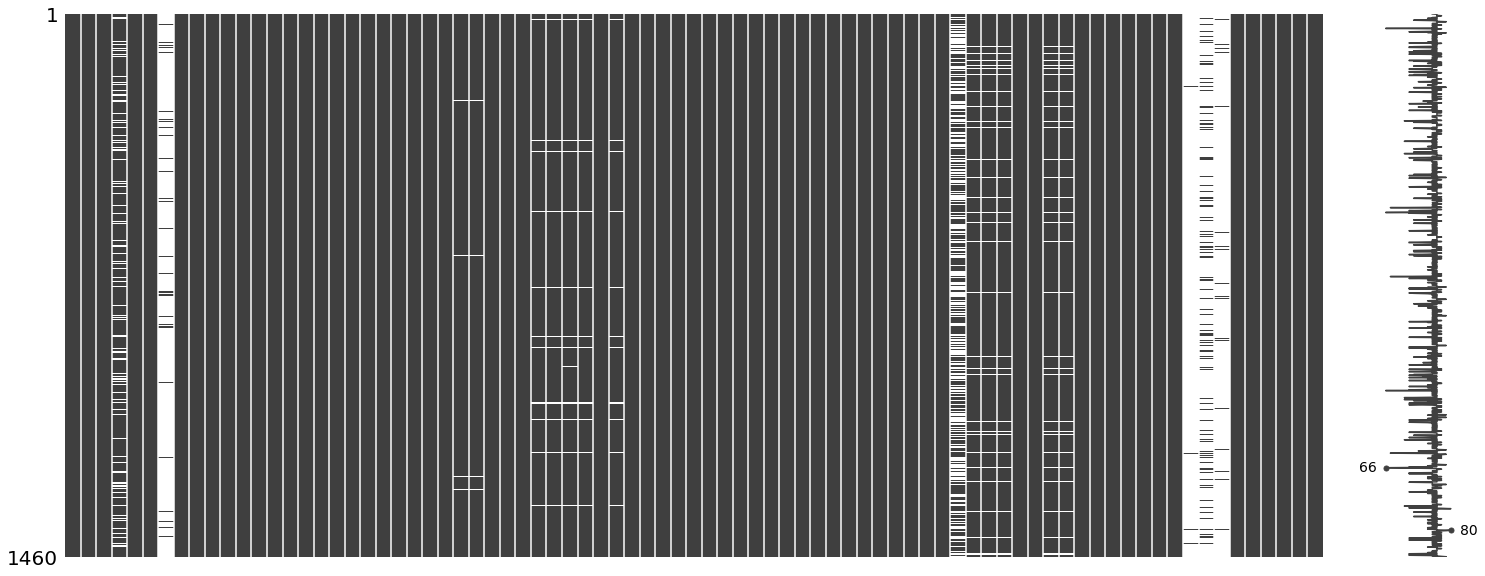

In [72]:
msno.matrix(raw_data)
plt.show()

In [76]:
#from looking at the matrix 5 columns have many missing values

missing = raw_data.isnull().sum().sort_values(ascending=False).head(20)
print("Missing values percentage")
display(missing/raw_data.shape[0])

Missing values percentage


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [77]:
#Deep Copy the dataset
#Delete the 5 columns with more than 20% missing data and the 'id' column

pre_data = raw_data.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1).copy()
print("Missing values")
pre_data.isnull().sum().sort_values(ascending=False).head(15)

Missing values


LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageCond       81
GarageQual       81
GarageFinish     81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
Exterior1st       0
dtype: int64

In [99]:
pre_data['LotFrontage'].fillna(0,inplace=True)
pre_data['GarageType'].fillna('NAN',inplace=True)
pre_data['GarageCond'].fillna('NAN',inplace=True)
pre_data['GarageQual'].fillna('NAN',inplace=True)
pre_data['GarageFinish'].fillna('NAN',inplace=True)
pre_data['GarageYrBlt'][pre_data['GarageYrBlt'].isnull()]=pre_data['YearBuilt']
pre_data['BsmtExposure'].fillna('NAN',inplace=True)
pre_data['BsmtFinType1'].fillna('NAN',inplace=True)
pre_data['BsmtFinType2'].fillna('NAN',inplace=True)
pre_data['BsmtCond'].fillna('NAN',inplace=True)
pre_data['BsmtQual'].fillna('NAN',inplace=True)
pre_data['MasVnrType'].fillna('NAN',inplace=True)
pre_data['MasVnrArea'].fillna(0,inplace=True)
pre_data['Electrical'].fillna('SBrkr',inplace=True)

In [104]:
print("Number of Missing values")
pre_data.isnull().sum().sum()

Number of Missing values


0

# Exploratory Analysis

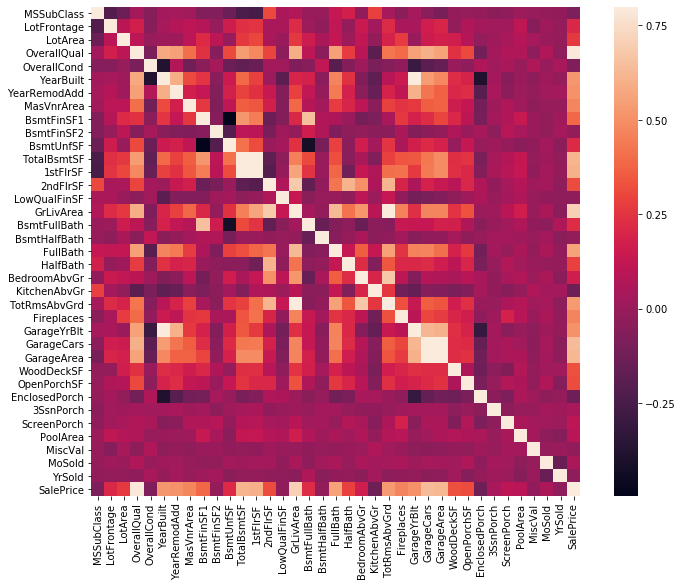

In [109]:
corr_mat = pre_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True);

In [110]:
corr_mat['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageYrBlt      0.508043
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64